In [1]:
import pandas as pd
import re
from packaging import version
import operator
import matplotlib
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

from util.api import create_lts_obj, compute_monad_usage_by_df, calculate_bottom, get_lts_list


In [2]:
lts_list = get_lts_list()
df_list = []
df_by_category_list = []

for idx, lts in enumerate(lts_list):
    df = pd.read_pickle(f'../../data/lts-{lts}/lts-{lts}.df')
    df_list.append(df)

In [3]:
df_list[0].keys()

Index(['package', 'version', 'stability', 'cabal-file', 'categories', 'deps',
       'provided-modules', 'src-dirs', 'main-modules', 'mtl-direct',
       'version-range-deps', 'provided-modules-found',
       'provided-modules-notfound', 'main-modules-found',
       'main-modules-notfound', 'imported-modules', 'Control.Monad.Cont',
       'Control.Monad.Cont.Class', 'Control.Monad.Error',
       'Control.Monad.Error.Class', 'Control.Monad.Except',
       'Control.Monad.Identity', 'Control.Monad.List', 'Control.Monad.RWS',
       'Control.Monad.RWS.Class', 'Control.Monad.RWS.Lazy',
       'Control.Monad.RWS.Strict', 'Control.Monad.Reader',
       'Control.Monad.Reader.Class', 'Control.Monad.State',
       'Control.Monad.State.Class', 'Control.Monad.State.Lazy',
       'Control.Monad.State.Strict', 'Control.Monad.Trans',
       'Control.Monad.Writer', 'Control.Monad.Writer.Class',
       'Control.Monad.Writer.Lazy', 'Control.Monad.Writer.Strict',
       'Control.Monad.Trans.Class', 'Cont

In [4]:
df_list[18][df_list[18]['package']=='transformers']

,package,version,stability,cabal-file,categories,deps,provided-modules,src-dirs,main-modules,mtl-direct,...,Control.Monad.State.Lazy,Control.Monad.State.Strict,Control.Monad.Trans,Control.Monad.Writer,Control.Monad.Writer.Class,Control.Monad.Writer.Lazy,Control.Monad.Writer.Strict,Control.Monad.Trans.Class,Control.Monad,System.IO
transformers-0.5.6.2,transformers,0.5.6.2,[],C:/Users/nicol/Desktop/lts/lts-18-18\transform...,[control],[base],"[Control.Applicative.Backwards, Control.Applic...",[.],[],0,...,0,0,0,0,0,0,0,1,1,0


In [7]:
monad_list = ['mtl','transformers','monads-fd','monads-tf','monadLib','mtl-tf','mmtl','mtlx','compose-trans',
              'control-monad-free','do-notation','exception-transformers','failable','free','indexed','monad-extras',
              'monad-logger','monad-time','monad-par-extras','monad-resumption','polysemy','parameterized','operational',
              'prim-uniq','ref-fd','ref-tf']
monad_list.sort()
#failable, free use mtl
pkg_with_monads = [[] for i in range(len(lts_list))]

for idx,df in enumerate(df_list):
    print('|------------------------------|')
    print(lts_list[idx])
    print(len(df)*0.005)
    for monad in monad_list:
        usage = 0
        for jdx,row in df.iterrows():
            if monad  in row['deps']:
                usage += 1
        
        if not df[df['package']==monad].empty:
            pkg_with_monads[idx].append(df[df['package']==monad]['package'])
            if usage >= len(df)*0.005:
                print(monad,' es importado un total  de: ',usage)

|------------------------------|
0-7
4.135
free  es importado un total  de:  7
monad-logger  es importado un total  de:  14
mtl  es importado un total  de:  179
transformers  es importado un total  de:  209
|------------------------------|
2-22
5.33
free  es importado un total  de:  13
monad-logger  es importado un total  de:  19
mtl  es importado un total  de:  238
transformers  es importado un total  de:  288
|------------------------------|
3-22
6.76
free  es importado un total  de:  18
monad-logger  es importado un total  de:  24
mtl  es importado un total  de:  305
operational  es importado un total  de:  7
transformers  es importado un total  de:  372
|------------------------------|
6-35
10.085
free  es importado un total  de:  23
monad-logger  es importado un total  de:  32
mtl  es importado un total  de:  460
transformers  es importado un total  de:  565
|------------------------------|
7-24
11.86
free  es importado un total  de:  25
monad-logger  es importado un total  de:  3

In [60]:
type(df_list[0][df_list[0]['package']=='base'])


pandas.core.frame.DataFrame

In [81]:
import glob
url = '../../data'
aux = ''
list = glob.glob(f"{url}/*")
lts_list = [lts.split('lts-')[1].replace('-','.') for lts in list]
lts_list = sorted(lts_list, key=lambda x: float(x))
lts_list = [lts.replace('.','-') for lts in lts_list]
lts_list.remove('18-18')
lts_list.insert(18,'18-18')

In [82]:
lts_list

['0-7',
 '2-22',
 '3-22',
 '6-35',
 '7-24',
 '9-21',
 '11-22',
 '12-14',
 '12-26',
 '13-11',
 '13-19',
 '14-27',
 '15-3',
 '16-11',
 '16-31',
 '17-2',
 '18-6',
 '18-8',
 '18-18']

<AxesSubplot:>

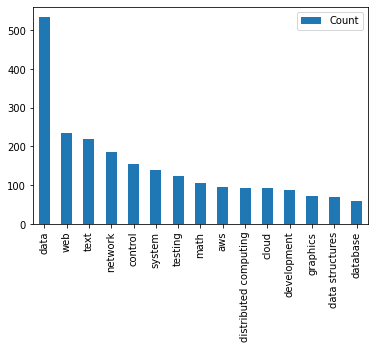

In [3]:
df = df_list[13]
df['categories']
dict_cat = {}
for categories in df['categories']:
    for category in categories:
        dict_cat[category] = 1 + dict_cat[category] if category in dict_cat else 1


df = pd.DataFrame(dict_cat.values(),dict_cat.keys(),['Count'])
df = df.sort_values(by=['Count'],ascending=False)

df.head(15).plot(kind='bar')

In [4]:
df_list[0][df_list[0]['package']=='QuickCheck']

,package,version,stability,cabal-file,categories,deps,provided-modules,src-dirs,main-modules,mtl-direct,...,Control.Monad.State.Lazy,Control.Monad.State.Strict,Control.Monad.Trans,Control.Monad.Writer,Control.Monad.Writer.Class,Control.Monad.Writer.Lazy,Control.Monad.Writer.Strict,Control.Monad.Trans.Class,Control.Monad,System.IO
QuickCheck-2.7.6,QuickCheck,2.7.6,[],C:/Users/nicol/Desktop/lts/lts-0-7\QuickCheck\...,[testing],[],"[Test.QuickCheck, Test.QuickCheck.Arbitrary, T...",[],[],0,...,0,0,0,0,0,0,0,1,1,1


In [6]:
for idx,df in enumerate(df_list):
    print('-----------------------')
    print('Processing LTS-',lts_list[idx])
    foo(df)

-----------------------
Processing LTS- 0-7
-----------------------
Processing LTS- 2-22
-----------------------
Processing LTS- 3-22
-----------------------
Processing LTS- 6-35
-----------------------
Processing LTS- 7-24
-----------------------
Processing LTS- 9-21
-----------------------
Processing LTS- 11-22
-----------------------
Processing LTS- 12-14
-----------------------
Processing LTS- 12-26
-----------------------
Processing LTS- 13-11
-----------------------
Processing LTS- 13-19
-----------------------
Processing LTS- 14-27
-----------------------
Processing LTS- 15-3
-----------------------
Processing LTS- 16-11


In [13]:
out_range = []
out_range_percentage =[]
total = []
list_out_range = []
list_in_range = []
list_any = []
for idx,df in enumerate(df_list):
    dict_out_range = []
    dict_in_range = []
    dict_any = []
    count_out_range = 0
    count_total = 0
    for idx,row in df.iterrows():
        pkg = row['package']
        deps = row['dependencies_status']
        for dep in deps:
            if deps[dep] == 'OUT_RANGE':
                count_out_range+=1
                dict_out_range.append((pkg,dep))
            elif deps[dep] == 'IN_RANGE':
                dict_in_range.append(dep)
            else:
                dict_any.append(dep)
            count_total+=1
    list_out_range.append(dict_out_range)
    list_in_range.append(dict_in_range)
    list_any.append(dict_any)
    out_range.append(count_out_range)
    out_range_percentage.append(count_out_range/count_total)
    total.append(count_total)

In [29]:
list_conflict = []
percentage = []
unique_out_range = []
for idx,array in enumerate(list_out_range):
    count = 0
    pkg_out_range = []
    print('lts-',lts_list[idx])
    for pkg,dep in list_out_range[idx]:
        if dep in list_in_range[idx]:
            count+=1
        else:
            pkg_out_range.append((pkg,dep))
    pkg_out_range = pkg_out_range
    unique_out_range.append(pkg_out_range)
    list_conflict.append(count)
    percentage.append(count/total[idx])
    print('Total dependencies with OUT_RANGE: ',len(list_out_range[idx]))
    print('Total dependencies with IN_RANGE: ',len(list_in_range[idx]))
    print('Total dependencies with ANY: ',len(list_any[idx]))
    print('Total dependencies: ',total[idx])

lts- 0-7
Total dependencies with OUT_RANGE:  10
Total dependencies with IN_RANGE:  3918
Total dependencies with ANY:  1701
Total dependencies:  5629
lts- 2-22
Total dependencies with OUT_RANGE:  12
Total dependencies with IN_RANGE:  5267
Total dependencies with ANY:  2274
Total dependencies:  7553
lts- 3-22
Total dependencies with OUT_RANGE:  33
Total dependencies with IN_RANGE:  6942
Total dependencies with ANY:  2969
Total dependencies:  9944
lts- 6-35
Total dependencies with OUT_RANGE:  72
Total dependencies with IN_RANGE:  10292
Total dependencies with ANY:  4881
Total dependencies:  15245
lts- 7-24
Total dependencies with OUT_RANGE:  106
Total dependencies with IN_RANGE:  11177
Total dependencies with ANY:  5001
Total dependencies:  16284
lts- 9-21
Total dependencies with OUT_RANGE:  119
Total dependencies with IN_RANGE:  12206
Total dependencies with ANY:  5528
Total dependencies:  17853
lts- 11-22
Total dependencies with OUT_RANGE:  129
Total dependencies with IN_RANGE:  11584
T

In [10]:
df = df_list[0]
pkg_to_analise = 'aeson'
for idx,row in df.iterrows():
    pkg = row['package']
    deps = row['deps']
    range = row['dependencies_status']
    for dep in deps:
        if dep == pkg_to_analise:
            print('pkg:',pkg,'deps: ',dep,'status: ',range[dep])

pkg: HTF deps:  aeson status:  IN_RANGE
pkg: MusicBrainz deps:  aeson status:  IN_RANGE
pkg: Spock deps:  aeson status:  IN_RANGE
pkg: aeson-pretty deps:  aeson status:  IN_RANGE
pkg: aeson-qq deps:  aeson status:  IN_RANGE
pkg: aeson-utils deps:  aeson status:  OUT_RANGE
pkg: arbtt deps:  aeson status:  IN_RANGE
pkg: authenticate deps:  aeson status:  IN_RANGE
pkg: aws deps:  aeson status:  IN_RANGE
pkg: bake deps:  aeson status:  ANY
pkg: bloodhound deps:  aeson status:  IN_RANGE
pkg: classy-prelude-yesod deps:  aeson status:  ANY
pkg: criterion deps:  aeson status:  IN_RANGE
pkg: fay deps:  aeson status:  IN_RANGE
pkg: fb deps:  aeson status:  IN_RANGE
pkg: fpco-api deps:  aeson status:  IN_RANGE
pkg: generic-aeson deps:  aeson status:  IN_RANGE
pkg: groundhog-th deps:  aeson status:  IN_RANGE
pkg: haskell-names deps:  aeson status:  ANY
pkg: haskell-packages deps:  aeson status:  IN_RANGE
pkg: heist deps:  aeson status:  IN_RANGE
pkg: holy-project deps:  aeson status:  ANY
pkg: hoo

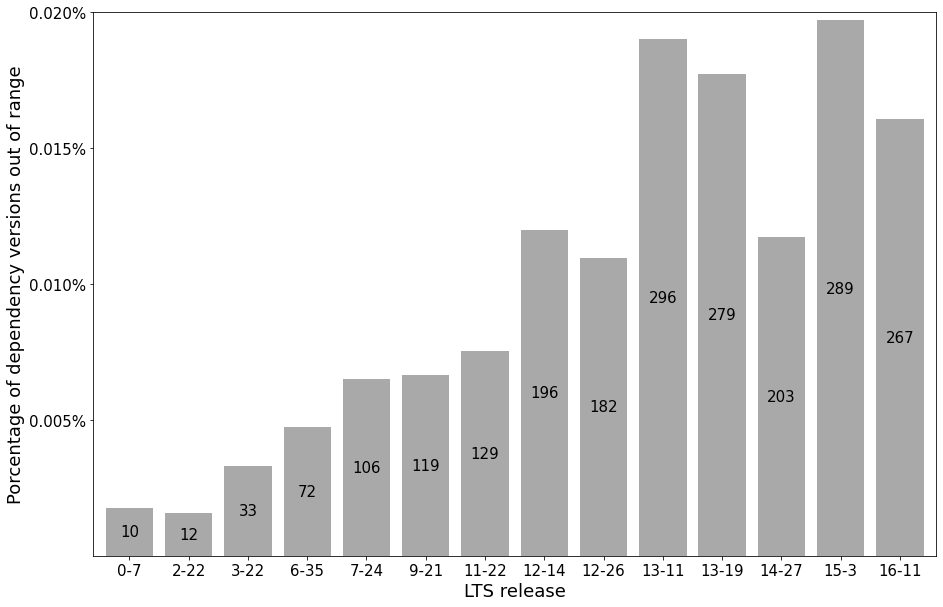

In [33]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.margins(0.015) 
plt.subplots_adjust(right=1.1)
print(out_range)
bar = ax.bar(x=lts_list, height=out_range_percentage, width=0.8, color='darkgrey', align='center', label='Dependdencies out of range')
ax.bar_label(bar, labels=list(out_range), label_type='center', color='black', fontsize=15)

ax.set_xticks(lts_list)
ax.set_xticklabels(lts_list,fontsize=15)
ax.set_yticks([0.005, 0.010, 0.015,0.020])
ax.set_yticklabels(['0.005%', '0.010%', '0.015%','0.020%'],fontsize=15)
ax.set_xlabel('LTS release',fontsize=18)
ax.set_ylabel('Porcentage of dependency versions out of range',fontsize=18)

plt.savefig("../../graphs/rq1_2.pdf", format='pdf', bbox_inches='tight')
plt.show()

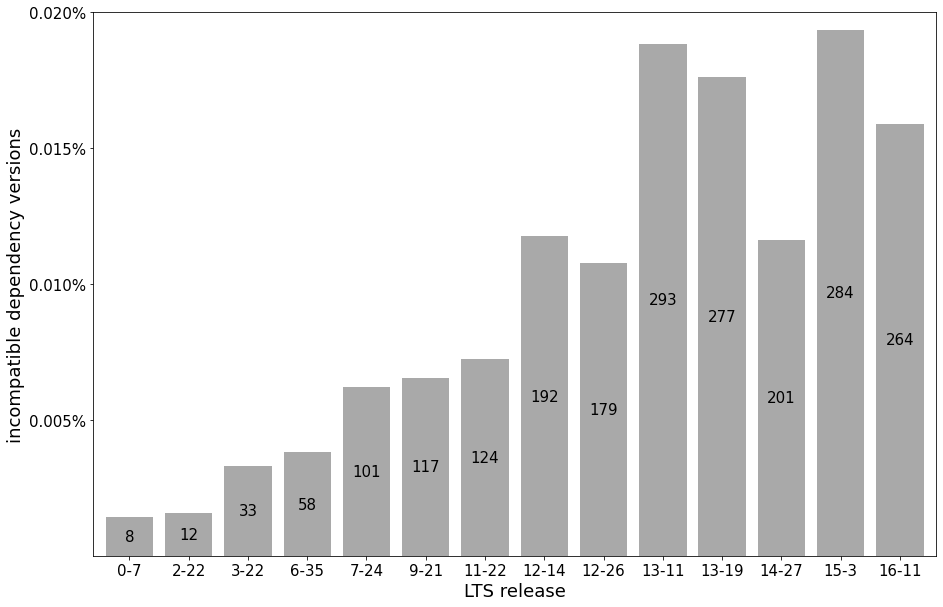

In [34]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.margins(0.015) 
plt.subplots_adjust(right=1.1)

bar = ax.bar(x=lts_list, height=percentage, width=0.8, color='darkgrey', align='center', label='Dependdencies inconsistent')
ax.bar_label(bar, labels=list(list_conflict), label_type='center', color='black', fontsize=15)

ax.set_xticks(lts_list)
ax.set_xticklabels(lts_list,fontsize=15)
ax.set_yticks([0.005, 0.010, 0.015,0.020])
ax.set_yticklabels(['0.005%', '0.010%', '0.015%','0.020%'],fontsize=15)
ax.set_xlabel('LTS release',fontsize=18)
ax.set_ylabel('incompatible dependency versions',fontsize=18)

plt.savefig("../../graphs/rq1_3.pdf", format='pdf', bbox_inches='tight')
plt.show()